In [1]:
using Plots
using LaTeXStrings
using Roots

# Examen 2
## Física computacional
#### Aquino Chapa Martha Abril 
Hecho en Julia 🔴🟢🟣

#### 1. Se tiene un oscilador armónico en dos dimensiones (xy) en el que la fuerza está dada por $\vec{F}= −k\vec{r}$ y se tiene una fricción $\vec{f}_{fric} = −γ\vec{v}$ si $|\vec{v}| ≤ 1$, pero cuando $|\vec{v}| > 1$ la fricción es $\vec{f}_{fric} = −µv^{3/2}\hat{v}$. Si m = 1, k = 1, γ = 0.1 y µ = 0.2, resuelva las siguientes ejercicios:

#### (a) Encuentre las ecuaciones de movimiento en coordenadas cartesianas. No es necesario resolver las ecuaciones.

Debido a la segunda ley de Newton, tendremos que la fuerza total del sistema será igual a la masa por la aceleración del sistema. Así se tiene que:
$$m\vec{a}=\vec{F}+\vec{f}_{fric}=m\frac{d^{2}\vec{r}}{dt^{2}} $$

Por lo cual se obtiene que:
Si $|\vec{v}|≤1$
$$m\frac{d^{2}\vec{r}}{dt^{2}} =−k\vec{r}−γ\vec{v}=−k\vec{r}−γ\frac{d\vec{r}}{dt} $$
Si $|\vec{v}|>1$
$$m\frac{d^{2}\vec{r}}{dt^{2}} =−k\vec{r}−µv^{3/2}\hat{v}=−k\vec{r}−µv^{1/2}\vec{v}=−k\vec{r}−µ\left(\frac{dr}{dt}\right)^{1/2}\frac{d\vec{r}}{dt}$$

Separamos las ecuaciones por componentes cartesianas.

En la coordenada $x$:

$$ \begin{cases}
 m\frac{d^{2}x}{dt^{2}}=−kx−γ\frac{dx}{dt} &   si  & |\vec{v}|≤1 \\
m\frac{d^{2}x}{dt^{2}}=−kx−µ\left(\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)^2\right)^{1/4}\frac{dx}{dt} &  si  & |\vec{v}|>1
\end{cases}$$

En el eje y:
$$ \begin{cases}
 m\frac{d^{2}y}{dt^{2}}=−ky−γ\frac{dy}{dt} &   si  & |\vec{v}|≤1 \\
m\frac{d^{2}y}{dt^{2}}=−ky−µ\left(\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)\right)^{1/4}\frac{dy}{dt} &  si  & |\vec{v}|>1
\end{cases}$$

Sustituyendo las constantes obtenemos las ecuaciones de movimiento:

En el eje x:
$$ \begin{cases}
 \frac{d^{2}x}{dt^{2}}=−x−0.1\frac{dx}{dt} &   si  & |\vec{v}|≤1 \\
\frac{d^{2}x}{dt^{2}}=−x−0.2\left(\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)\right)^{1/4}\frac{dx}{dt} &  si  & |\vec{v}|>1
\end{cases}$$
En el eje y:
$$ \begin{cases}
 \frac{d^{2}y}{dt^{2}}=−y−0.1\frac{dy}{dt} &   si  & |\vec{v}|≤1 \\
\frac{d^{2}y}{dt^{2}}=−y−0.2\left(\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)\right)^{1/4}\frac{dy}{dt} &  si  & |\vec{v}|>1
\end{cases}$$


Con lo cual podemos escribir el siguiente sistema de ecuaciones diferenciales:

$$x'=v_x $$
$$y'=v_y$$
$$ \begin{cases}
 v_x'=−x−0.1v_x &   si  & |\vec{v}|≤1 \\
v_x'=−x−0.2\left(v_x^{2}+v_y^{2}\right)^{1/4}v_x &  si  & |\vec{v}|>1
\end{cases}$$
En el eje y:
$$ \begin{cases}
v'_y=−y−0.1v_y &   si  & |\vec{v}|≤1 \\
v_y'=−y−0.2\left(v_x^{2}+v_y^{2}\right)^{1/4}v_y &  si  & |\vec{v}|>1
\end{cases}$$

#### (b) Utilice el método de Runge-Kutta de 4to orden para encontrar la solución a las ecuaciones de movimiento en el inciso anterior con condiciones iniciales $\vec{r}_0 = (0, 1)$ y $\vec{v}_0 = (\cos θ,\sin θ)$, donde $\theta =\frac{\pi n}{6}$ con n = 0, 1, 2, 3, ..., 10, 11.

Con las ecuaciones anteriores, podemos crear una función que nos devuelva la información del sistema de ecuaciones diferenciales lineales.

In [ ]:
function sistema1(x,t)
    dx=x[3]
    dy=x[4]
    v=x[3]^2+x[4]^2
    if sqrt(v)<=1
        dv_x=-x[1]-0.1*x[3]
        dv_y=-x[2]-0.1*x[4]
    else
        dv_x=-x[1]-0.2*(v^(1/4))*x[3]
        dv_y=-x[2]-0.2*(v^(1/4))*x[4]
    end
    return [dx,dy,dv_x,dv_y]
end

Ahora, extraemos la función de Runge-Kutta de 4to y 2do orden vistos en clase:

In [83]:
function RK_2(edo,x_ini,t)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = sol[i,:] .+ 0.5*δ .*edo(sol[i,:],t[i])
        sol[i+1,:] .= sol[i,:] .+ δ*edo(k1,t[i]+0.5*δ)
    end
    return sol
end

RK_2 (generic function with 1 method)

In [3]:
function RK_4(edo,x_ini,t)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(sol[i,:],t[i])
        k2 = edo(sol[i,:] .+ 0.5*δ.*k1 , t[i] + 0.5*δ)
        k3 = edo(sol[i,:] .+ 0.5*δ.*k2 , t[i] + 0.5*δ)
        k4 = edo(sol[i,:] .+ δ.*k2 , t[i] + δ)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end

RK_4 (generic function with 1 method)

In [91]:
function Euler_1(edo,p_ini,t)
    sol = zeros(length(t),length(p_ini))
    sol[1,:] = p_ini
    δ = t[2]-t[1]
    for i in 1:(length(t)-1)
        sol[i+1,:] .= sol[i,:] .+ δ*edo(sol[i,:],t[i])
    end
    return sol
end

Euler_1 (generic function with 1 method)

In [76]:
function MovimientoRectilineoUniformementeAcelerado(cond_ini,t)
        #cond_ini = [x,y,z,vx,vy,vz,ax,ay, az]
        #La acelación debe ser un parametro solicitdado por la GUI
    
    a = 1#cond_ini[7]

    x_dot = cond_ini[4] + a*t
    y_dot = 0
    z_dot = 0
    vx_dot = a
    vy_dot = 0
    vz_dot = 0
    
    return [x_dot,y_dot,z_dot,vx_dot,vy_dot,vz_dot]
end

MovimientoRectilineoUniformementeAcelerado (generic function with 1 method)

In [58]:
function MovimientoRectilineoUniforme(cond_ini,t)
        #[x,y,z,vx,vy,vz] <- importante y para poner en documentacion
        x_dot = cond_ini[4]
        y_dot = 0
        z_dot = 0
        vx_dot = 0
        vy_dot = 0
        vz_dot = 0
        return([x_dot,y_dot,z_dot,vx_dot,vy_dot,vz_dot])
end

MovimientoRectilineoUniforme (generic function with 1 method)

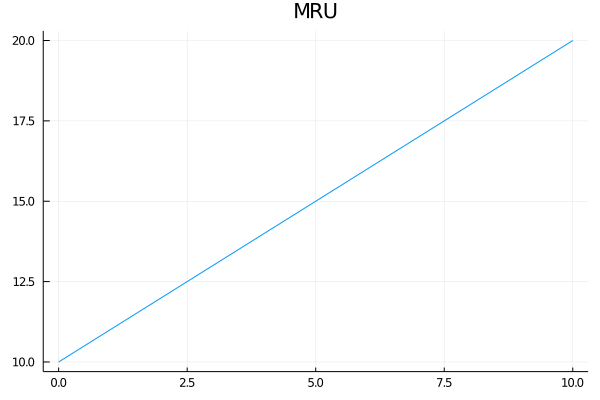

In [75]:
t=collect(0:0.01:10)
condicion = [10,0,0,1,0,0]
x=(1/2)*t.^2
plot(title="MRU")
plot!(t,RK_4(MovimientoRectilineoUniforme,condicion,t)[:,1],label=false)

In [ ]:
def 

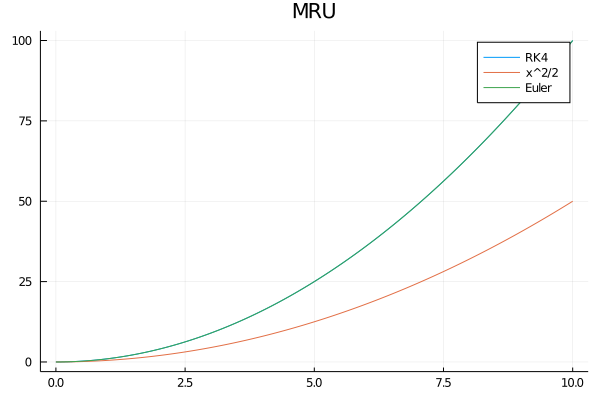

In [97]:
t=collect(0:0.001:10)
condicion = [0,0,0,0,0,0]
x=(1/2)*t.^2
plot(title="MRU")
plot!(t,RK_4(MovimientoRectilineoUniformementeAcelerado,condicion,t)[:,1],label="RK4")
plot!(t,x,label="x^2/2")
plot!(t,Euler_1(MovimientoRectilineoUniformementeAcelerado,condicion,t)[:,1],label="Euler")

In [79]:
function deriv_h2(f,x)
    f_prima = zeros(length(f))
    h = x[2] - x[1]
    for i in 1:(length(f)-1)
        f_prima[i] = ( f[i+1]-f[i] )/h
    end
    # calcular el ultimo punto
    f_prima[end] = - ( f[end-1]-f[end] )/h 
    return f_prima
end

deriv_h2 (generic function with 1 method)

In [81]:
deriv_h2(RK_4(MovimientoRectilineoUniformementeAcelerado,condicion,t)[:,4],t)

10001-element Array{Float64,1}:
 0.9999999999998899
 0.9999999999998899
 0.9999999999998899
 0.9999999999998899
 0.9999999999998899
 0.9999999999998899
 0.9999999999998899
 0.9999999999998899
 0.9999999999998899
 0.9999999999998899
 0.9999999999998899
 0.9999999999998899
 0.9999999999998899
 ⋮
 0.9999999999994458
 0.9999999999994458
 0.9999999999994458
 0.9999999999994458
 0.9999999999994458
 0.9999999999994458
 0.9999999999994458
 0.9999999999994458
 0.9999999999994458
 0.9999999999994458
 0.9999999999994458
 0.9999999999994458

Probamos nuestra solución con n=0, en un tiempo de $[0,50\pi]$.

In [ ]:
tiempo1_p=collect(0:0.01:100)
sol1_p=RK_4(sistema1,[0.0,1.0,1.0,0.0],tiempo1_p)

Ahora, creamos un ciclo para cumplir la condición de que $\theta=\frac{\pi n}{6}$ con n = 0, 1, 2, 3, ..., 10, 11.

In [ ]:
#Definimos nuestro conjunto de n's
n=collect(0:11)
#Definimos el tiempo donde evaluaremos la función
tiempo1=collect(0:0.01:100)
for i in n 
    sol1=RK_4(sistema1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempo1)
end

Presentamos el resultado a manera de gráfica:

In [ ]:
plot(title="Solución para x con diversos valores de n usando RK_4",xlabel="t",ylabel="x(t)")
for i in n 
    sol1=RK_4(sistema1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempo1)
    plot!(tiempo1,sol1[:,1],label ="n=$(i)", lw=1.0)
end
plot!()

In [ ]:
plot(title="Solución para y con diversos valores de n usando RK_4",xlabel="t",ylabel="y(t)")
for i in n 
    sol1=RK_4(sistema1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempo1)
    plot!(tiempo1,sol1[:,2],label ="n=$(i)", lw=1.0)
end
plot!()

In [ ]:
plot(title="Solución para v_x con diversos valores de n usando RK_4",xlabel="t",ylabel="v_x(t)")
for i in n 
    sol1=RK_4(sistema1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempo1)
    plot!(tiempo1,sol1[:,3],label ="n=$(i)", lw=1.0)
end
plot!()

In [ ]:
plot(title="Solución para v_y con diversos valores de n usando RK_4",xlabel="t",ylabel="v_y(t)")
for i in n 
    sol1=RK_4(sistema1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempo1)
    plot!(tiempo1,sol1[:,4],label ="n=$(i)", lw=1.0)
end
plot!()

#### (c) Genere una función que calcule la energía para las distintas condiciones iniciales y detenga la simulación cuando esta sea menor al 30 % de su valor inicial. Cabe mencionar que debe hacer su simulación (paso de integración) de tal manera que el error en la trayectoria no tenga variaciones de más del 1 %, es decir se debe asegurar convergencia a la solución con error de a lo mas 1 %.

La energía total de nuestro sistema será:
$$E=\frac{m}{2}(v_x^{2}+v_y^{2})+\frac{k}{2}(x^{2}+y^{2}) $$
Sustituimos k=1=m y se tiene que
$$E=\frac{1}{2}(v_x^{2}+v_y^{2}+x^{2}+y^{2}) $$
Así, definimos una función que nos de la energía del sistema a cada tiempo:

In [ ]:
function energia(p0,t,EDO)
    #Definimos los arreglos donde anexaremos la información sobre las posiciones y velocidades
    x=RK_4(EDO,p0,t)[:,1]
    y=RK_4(EDO,p0,t)[:,2]
    vx=RK_4(EDO,p0,t)[:,3]
    vy=RK_4(EDO,p0,t)[:,4]
    #Definimos el arreglo donde guardaremos la información de la energía a cada tiempo
    U=[]
    #Definimos la energía inicial
    Uinicial=0.5*(x[1]^2+y[1]^2+vx[1]^2+vy[1]^2)
    #Realizamos un ciclo para obtener la energía en los tiempos posteriores
    for i in 1:length(t)
        energia=0.5*(x[i]^2+y[i]^2+vx[i]^2+vy[i]^2)
        if energia>=0.3*Uinicial
            push!(U,energia)
        else
            return U
        end 
    end 
end

Ahora, para ver que tenemos una convergencia de 1%, definamos una función que nos de la máxima variación que tiene nuestra solución, esto comparando la solución dada con el método Runge-Kutta de 2do orden y de 4to orden, analizando que se cumpla que el error es menor a 0.01.
Se hace uso del método de Runge-Kutta de segundo orden, debido a que si quisieramos utilizar el mismo método (Runge-Kutta de 4to orden), se tendría que cambiar el paso de integración, por lo que los tiempos no necesariamente serían iguales y no se podrían comparar las soluciones correctamente.

In [ ]:
#Pedimos dos soluciones
function variacion(sol1,sol2)
    #Guardamos la información de la velocidad y posición en arreglos.
    x1=sol1[:,1]
    y1=sol1[:,2]
    vx1=sol1[:,3]
    vy1=sol1[:,4]
    x2=sol2[:,1]
    y2=sol2[:,2]
    vx2=sol2[:,3]
    vy2=sol2[:,4]
    #Definimos los arreglos donde anexaremos la diferencia en soluciones a cada tiempo
    difx=[]
    dify=[]
    difvx=[]
    difvy=[]
    #Hacemos un ciclo donde iremos anexando las diferencias de cada solución
    for i in 1:length(sol1[:,1])
        push!(difx,abs(x1[i]-x2[i]))
        push!(dify,abs(y2[i]-y1[i]))
        push!(difvx,abs(vx1[i]-vx2[i]))
        push!(difvy,abs(vy1[i]-vy2[i]))
    end
    #Definimos el arreglo donde anexamos el máximo de cada una de las diferencias en las soluciones en x,y,vx y vy
    dif=[maximum(difx),maximum(dify),maximum(difvx),maximum(difvy)]
    #Obtenemos la diferencia máxima
    max=maximum(dif)
    return max
end

Para obtener el tiempo correspondiente a cada energía creamos una función que nos devuelva un arreglo de tiempo

In [ ]:
function energia_tiempo(p0,t,EDO)
    #Definimos los arreglos donde anexaremos la información sobre las posiciones y velocidades
    x=RK_4(EDO,p0,t)[:,1]
    y=RK_4(EDO,p0,t)[:,2]
    vx=RK_4(EDO,p0,t)[:,3]
    vy=RK_4(EDO,p0,t)[:,4]
    #Definimos el arreglo donde guardaremos la información de la energía a cada tiempo
    U=[]
    tiempo=[]
    #Definimos la energía inicial
    Uinicial=0.5*(x[1]^2+y[1]^2+vx[1]^2+vy[1]^2)
    #Realizamos un ciclo para obtener la energía en los tiempos posteriores
    for i in 1:length(t)
        energia=0.5*(x[i]^2+y[i]^2+vx[i]^2+vy[i]^2)
        if energia>=0.3*Uinicial
    
            #push!(U,energia)
            push!(tiempo,t[i])
        else
            return tiempo
        end 
    end 
   
end

Hagamos un ciclo donde se analice la convergencia de las soluciones en un tiempo y notemos si se cumple la solución.

In [ ]:
#Definimos nuestro conjunto de n's
n=collect(0:11)
#Definimos el tiempo donde evaluaremos la función
tiempo1_v=collect(0:0.01:100)
#Creamos un arreglo donde anexaremos la convergencia de nuestras soluciones a diferentes i
variaciones=[]
for i in n 
    push!(variaciones, variacion(RK_4(sistema1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempo1_v),RK_2(sistema1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempo1_v)))
end
#Le pedimos a nuestro arrelo que nos regrese la variación convergencia máxima de todas las soluciones.
return(maximum(variaciones))

Vemos que se cumple que la convergencia de 0.01, con el tiempo llamado tiempo1_v, así, podemos proceder a obtener la energía para las diferentes n's.

In [ ]:
tiempo1_v=collect(0:0.01:100)
plot(title="Energía del sistema",xlabel="t",ylabel="U[N]")
for i in n 
    U=(energia([0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempo1_v,sistema1))
    t=(energia_tiempo([0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempo1_v,sistema1))
    plot!(t,U,label ="n=$(i)", lw=1.0)
end
plot!()

Al presentar los resultados en una gráfica notamos como la simulación sólo nos devuelve los datos hasta que la energía es menor al 30% de la inicial.

#### (d) Dibuje las gráficas del momento angular para los casos anteirores en el inciso (1b). 

Sabemos que el momento angular se define como 
$$\vec{L}=\vec{r}\times m\vec{v} $$
Sin embargo, debido a que la posición y velocidad se encuentran confinadas en el plano xy, el momento angular será:
$$\vec{L}=m(xv_y-yv_x)\hat{e}_z $$
Entonces dados $x,vy,vx,y$ definimos una función que nos regrese el momento angular. 

In [ ]:
function MomentoAngular(x,y,vx,vy,m=1)
    #Definimos un arreglo donde se guardarán los datos del momento
    momento=[]
    #Realiasamos un ciclo donde se obtendrá el momento en cada tiempo
    for i in 1:length(x)
        push!(momento,m*(x[i]*vy[i]-y[i]*vx[i]))
    end
    #Le pedimos a la función que nos regrese el arreglo momento
    return momento
end

Realizamos un ciclo para gráficar el momento del sistema a cada tiempo para diferentes condiciones iniciales

In [ ]:
tiempo1_v2=collect(0:0.01:100)
plot(title="Momento en el eje z",xlabel="t",ylabel="L_z")
for i in n 
    sol=RK_4(sistema1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempo1_v2)
    momento=MomentoAngular(sol[:,1],sol[:,2],sol[:,3],sol[:,4])
    plot!(tiempo1_v2,momento,label ="n=$(i)", lw=1.0)
end
plot!()

#### (e) Tome de manera arbitraria alguna condición inicial y dibuje el espacio fase (px, x).

Iniciamos generando nuestra condición inicial random:

In [ ]:
condicion=[rand(1:10),rand(1:10),rand(1:10),rand(1:10)]

In [ ]:
#Definimos el tiempo
tiempo1_v3=collect(0:0.01:70π)
plot(title="Espacio fase",xlabel="x",ylabel="px")
x=RK_4(sistema1,condicion,tiempo1_v3)[:,1]
#Debido a que la masa de nuestro sistema es 1 p_x=v_x
vx=RK_4(sistema1,condicion,tiempo1_v3)[:,3]
plot!(x,vx)

#### 2.Suponga que se tiene el sistema como en el problema anterior, pero ahora la partícula tiene carga q>0 y en el origen también se encuentra una partícula de carga q>0.
#### Sin considerar la fricción, ¿El sistema puede tener órbitas cerradas? De ser asím encuentre algunas de las órbitas o muestre que el sistema no puede tener este tipo de óbitas. (Apoye sus argumentos con alguna simulación).

Debido a la segunda ley de Newton, tendremos que la fuerza total del sistema será igual a la masa por la aceleración del sistema. Además, la fuerza total sobre el sistema será la dada en el ejercicio, sin embargo debido a que tenemos dos partículas cargadas debemos anexarle la fuerza de Coulomb en coordenadas cartesianas.
$$m\vec{a}=\vec{F}+\vec{F}_{C}=m\frac{d^{2}\vec{r}}{dt^{2}} $$

Debido a que una de las cargas se encuentra en el origen, la fuerza de Coulomb se reduce a 
$$\vec{F}_{C}=\frac{q^{2}}{4\pi\epsilon_0r^{2}}\vec{r} $$

Así, la expresión final de la fuerza, en el caso sin fricción es:
$$m\vec{a}=-k\vec{r}+\frac{q^{2}}{4\pi\epsilon_0r^{2}}\vec{r}=m\frac{d^{2}\vec{r}}{dt^{2}}  $$

Una manera de pensar un sistema que obedezca a la fuerza dada en el ejercicio es como un resolte que en el origen tiene una carga y en el extremo del resorte posee otra. Recordemos que en caso del resorte, este sí posee orbitas cerradas, sin embargo, al anexarle la fuerza del Coulomb pierde esta sutileza el sistema que lo volvía cerrado en el movimiento. Por lo cual, de manera general, el sistema no puede tener curvas cerradas. Sin embargo, si la fuerza de Coulomb es lo suficientemente pequeña, el cambio en la trayectoria es casi imperceptible con tiempos suficientemente pequeños. Sin embargo, si tomamos tiempo más grandes, esta fuerza actuará por más tiempo en el sistema, generando que las trayectorias no sean cerradas.

Tomando cordenadas cartesianas tendremos que: 

$$m\vec{a}=-kx\hat{x}-ky\hat{y}+\frac{q^{2}}{4\pi\epsilon_0(x^{2}+y^{2})}(x\hat{x}+y\hat{y})=m\frac{d^{2}\vec{r}}{dt^{2}}$$

Por lo cual, separando por componentes obtenemos

En x
$$m\frac{d^2x}{dt}=-kx+\frac{q^{2}x}{4\pi\epsilon_0(x^{2}+y^{2})} $$
En y
$$ m\frac{d^2y}{dt}=-ky+\frac{q^{2}y}{4\pi\epsilon_0(x^{2}+y^{2})} $$

Así, tomando m=1, podemos describir los siguientes sistemas de ecuaciones diferenciales:

$$x'=v_x$$
$$y'=v_y$$

$$v'_x=-kx+\frac{q^{2}x}{4\pi\epsilon_0(x^{2}+y^{2})^{3/2}} $$
$$v'_y=-ky+\frac{q^{2}y}{4\pi\epsilon_0(x^{2}+y^{2})^{3/2}} $$
Teniendo el sistema de ecuaciónes, con k=1, definamos una función que nos devuelva la información de este sistema:

In [ ]:
function sistema2_a(x,t)
    epsilon=8.85418781e-12
    #Definimos la carga del sistema
    q=0.0000000000000001
    c=q^2/(4*pi*epsilon)
    dx=x[3]
    dy=x[4]
    r=x[1]^2+x[2]^2
    dv_x=-x[1]+(c)*(x[1]/(r))
    dv_y=-x[2]+(c)*(x[2]/(r))
    #Notemos que se omitio el if que sí teniamos en el sistema1 debido a que no tenemos la fricción que nos da esa condición
    return [dx,dy,dv_x,dv_y]
end

Para confirmar lo dicho sobre el movimiento del sistema, resolvamos las ecuaciones diferenciales con tiempos pequeño, carga q pequeña $q=1x10^{-16}$, la cual tiene sentido físico debido a que es 1000 veces la carga del protón, gráficando la trayectoria.

In [ ]:
tiempo2b_1=collect(0:0.1:2.01π)
plot(title="",xlabel="x",ylabel="y")
sol=RK_4(sistema2_a,[0.0,1.0,1.0,0.0],tiempo2b_1)
y1=sol[:,2]
x1=sol[:,1]
cero=
plot!(x1,y1,label="y")

Donde tomamos un tiempo de 0 a 2.5$\pi$ y notamos una órbita cerrada. Sin embargo, tomando las mismas condiciones, pero un tiempo más largo, veamos como se modifica y ya no es cerrada.

In [ ]:
tiempo2=collect(0:0.1:10000π)
plot(title="",xlabel="x",ylabel="y")
sol=RK_4(sistema2_a,[0.0,1.0,1.0,0.0],tiempo2)
y=sol[:,2]
x=sol[:,1]
cero=
plot!(x,y,label="y")

Notemos que las condiciones iniciales no afectan de manera trascendente la solución, así, con esto concluimos que nuestro sistema no puede tener órbitas cerradas, sin embargo, bajo condiciones adecuadas, las órbitas de movimiento se pueden aproximar de buena manera a una.

#### b. Considerando fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de ´orbitas. (Apoye sus argumentos con alguna simulación).

Iniciemos analizando la fuerza del sistema para poder obtener el sistema de ecuaciónes lineales diferenciales. En este caso, la fuerza será la obtenida en el inciso anterior, sumando la dada por la fuerza de fricción.

Por lo cual se obtiene que:
Si $|\vec{v}|≤1$
$$m\vec{a}=-k\vec{r}+\frac{q^{2}}{4\pi\epsilon_0r^{2}}\vec{r}−γ\frac{d\vec{r}}{dt} $$
Si $|\vec{v}|>1$
$$m\vec{a}=-k\vec{r}+\frac{q^{2}}{4\pi\epsilon_0r^{2}}\vec{r}−µ(\frac{dr}{dt})^{1/2}\frac{d\vec{r}}{dt}$$

En este inciso, tenemos un caso similar al de inciso anterior, usando un razonamiento similar, se esperaría que el sistema no tuviera órbitas cerradas, o que se tuviera casi órbitas cerrradas sólo cuando la suma de la fuerza de Coulomb con la fuerza de fricción se aproximaran a cero, y órbitas cerradas cuando la fuerza de Coulomb cancela la fuerza de fricción, sin embargo, como en el caso anterior, esto sólo podría ocurrir para cargas especificas que apoyarán a cancelar la fricción.

Por lo que el sistema de ecuaciones es
$$x'=v_x $$
$$y'=v_y$$
$$ \begin{cases}
 v_x'=−x−0.1v_x &   si  & |\vec{v}|≤1 \\
v_x'=−x−0.2\left(v_x^{2}+v_y^{2}\right)^{1/4}v_x+\frac{q^{2}x}{4\pi\epsilon_0(x^{2}+y^{2})^{3/2}} &  si  & |\vec{v}|>1
\end{cases}$$
En el eje y:
$$ \begin{cases}
v'_y=−y−0.1v_y &   si  & |\vec{v}|≤1 \\
v_y'=−y−0.2\left(v_x^{2}+v_y^{2}\right)^{1/4}v_y+\frac{q^{2}y}{4\pi\epsilon_0(x^{2}+y^{2})^{3/2}} &  si  & |\vec{v}|>1
\end{cases}$$

Al analizar el sistema de ecuaciones, para que la fuerza de fricción más la fuerza de Coulomb tiendan a 0,para que el sistema tenga órbitas cerradas,almenos con tiempos pequeños, se tendrían que cumplir las siguientes condiciones:
* Que la fuerza de Coulomb cambiará dependiendo de la velocidad.
* La carga se tendría que calcular a partir de las ecuaciones diferenciales que se obtienen de igualar o aproximar la fuerza de fricción a la fuerza de Coulomb. 
Notemos que este último punto nos trae múltiples restricciones, ya que al resolver las ecuaciones para obtener la carga, no se puede asegurar que estas satisfacerían la ecuación diferencial, así, no se cree que el sistema pueda tener órbitas cerradas.

Para analizar el comportamiento del sistema, definamos una función que nos da la solución al sistema de ecuaciones diferenciales del sistema.

In [ ]:
function sistema2_b(x,t,q)
    epsilon=8.85418781e-12
    #q=0.0000000000000001
    c=q^2/(4*pi*epsilon)
    dx=x[3]
    dy=x[4]
    r=x[1]^2+x[2]^2
    v=x[3]^2+x[4]^2
    if sqrt(v)<=1
        dv_x=-x[1]-0.1*x[3]+((c)*(x[1]/(r)))
        dv_y=-x[2]-0.1*x[4]+((c)*(x[2]/(r)))
    else
        dv_x=-x[1]-0.2*(v^(1/4))*x[3]+((c)*(x[1]/(r)))
        dv_y=-x[2]-0.2*(v^(1/4))*x[4]+((c)*(x[2]/(r)))
    end
    return [dx,dy,dv_x,dv_y]
end

Para poder resolver el sistema anterior que depende de la carga es necesario modificar la función de Runge-Kutta para poder evaluar q.

In [ ]:
function RK_2_2(edo,x_ini,t,q)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = sol[i,:] .+ 0.5*δ .*edo(sol[i,:],t[i],q)
        sol[i+1,:] .= sol[i,:] .+ δ*edo(k1,t[i]+0.5*δ,q)
    end
    return sol
end

In [ ]:
cargas=[1e-4,3e-4,8e-4]
tiempocargas=collect(0:0.1:30)
plot(title="Solución para x y y con diversos valores de q usando RK_2",xlabel="t",ylabel="Posición")
for i in cargas
    x=RK_2_2(sistema2_b,[0.0,0.1,1.0,1.0],tiempocargas,i)[:,1]
    y=RK_2_2(sistema2_b,[0.0,0.1,1.0,1.0],tiempocargas,i)[:,2]
    plot!(tiempocargas,x,label="x,q=$(i)",lw=1.0)
    plot!(tiempocargas,y,label="y,q=$(i)",lw=1.0)
end
plot!()

Vemos de la gráfica de arriba que, para algunas cargas, la posición en x o y nunca vuelve a tener el valor que tenía, hasta que llega al reposo. Esto es debido a la fricción y la fuerza de Coulomb del sistema. Con ello confirmamos que sí el sistema tiene una carga q constante, entonces no tendrá órbitas cerradas.

#### 3. Se tiene la siguiente función: $$f(x,y)=2e^{(x+1)^{2}}\left(e^{-(y+2)^{2}}+e^{-(y-2)^{2}}\right)+6x(x^{2}+y^{2})e^{-(x^{2}+y^{2})}-1$$ Encuentre los puntos $(x, y)$ tales que $f(x, y)=0$ y dibuje estos puntos en el plano xy.
#### Hint: Como podrá notar los puntos a buscar se encuentran en la región x, y ∈ (−4, 4) × (−4, 4). Una forma de obtener los puntos es haciendo un barrido para x fija y encontrando todas las raíces de la ecuación en términos de y. Entre más fino haga el barrido, la curva de nivel que se encuentre será mejor.

Para realizar el presente ejercicio utilizaré el método de bisección, sin embargo, la función vista en clase sólo nos da una raíz en el intervalo, así, el primer paso es crear una función que nos devuelva todas las raíces de una función f(x) dentro de un intervalo.

In [ ]:
function raiz_bf(funcion,interval,error=1e-4)
    #Tomamos el intervalo y lo cortamos en pequeñas particiones, para en estos subintervalos aplicar el método ed bisección
    particion=abs((interval[2]-interval[1])/error)
    #Creamos un arreglo donde anexaremos las raices que nos de el método de bisección
    raices1=[]
    #Creamos un segundo arreglo donde obtengamos las raíces filtradas
    raices2=[]
    #Hacemos un ciclo donde a cada subinvervalo le aplicaremos el método de bisección
    for i in 1:particion
        #Definimos el i-ésimo intervalo
        intervalo=[interval[1]+error*(i-1),interval[1]+error*i]
        #Implementamos el método de bisección visto en clase al subintervalo
        raiz = 0.5*(intervalo[1]+intervalo[2])
        iteracion = 0
        while abs(intervalo[2]-intervalo[1]) > error
            f_izq , f_med = funcion(intervalo[1]) , funcion(raiz)
            if f_izq*f_med < 0
                intervalo[2] = raiz
            else
                intervalo[1] = raiz
            end
            raiz = 0.5*(intervalo[1]+intervalo[2])
            iteracion += 1
        end
        #Ya que la computadora encontro la "raíz" en el i-ésimo intervalo anexamos la raiz al arreglo raices1
        push!(raices1,raiz)
    end
    #con lo siguiente
    #filtramos las raices, ya que el método de bisección, si no encuentra raíces en el intervalo devuelve extremos del intervalo
    for i in 1:length(raices1)
        #Comparamos la evaluación de la "raiz"
        m=raices1[i]
        #Y si es menor o igual al error la anexamos al segundo arreglo de raices
        if abs(funcion(m))<=error
            push!(raices2,m)
        #Si la "raíz" no cumple con el error la descartamos
        else
            false
        end
    end
    #Le pedimos a la función que nos devuelva el segundo arreglo
    return raices2
end

Probando la función.

In [ ]:
raiz_prueba=raiz_bf(sin,[-2π,2π+0.1])
fraices_prueba=sin.(raiz_prueba)
x_prueba=collect(-2π-0.1:0.1:2π+0.1)
fx_prueba=sin.(x_prueba)
plot(title="Raíces de la función sin(x)",xlabel="x",ylabel="f(x)")
scatter!(raiz_prueba,fraices_prueba)
plot!(x_prueba,fx_prueba)

Ya que probamos que nuestra función trabaja apropiadamente, obtengamos las raíces del ejercicio.
Para ello, crearemos una malla donde se obtendrán las y's en el intervalo [-4,4], para evaluar la función en esos puntos y obtener las raíces en cada uno de ellos.

In [ ]:
plot(title="Raíces de la función f(x,y)",xlabel="x",ylabel="y")
#Definimos un arreglo donde iremos anexando las raices
raices=[]
#Definimos nuestra malla donde evaluaremos las y's
yp=collect(-4:0.001:4)
#Definimos un arreglo donde anexaremos la y-ésima correspondiente a la i-ésima raiz
ys=[]
#Realizamos un ciclo donde evaluaremos la función en una y y buscaremos la raíz en f(x,y=ys) 
for y0 in yp
    fx(x,y=y0)=2*exp(-(x+1)^2)*(exp(-(y+2)^2)+exp(-(y-2)^2)) + 6*x*(x^2 + y^2)*exp(-(x^2+y^2))-1
    n=length(raiz_bf(fx,[-4,4]))
    for i in 1:n
        elemento=raiz_bf(fx,[-4,4])[i]
        push!(raices,elemento)
        push!(ys,y0)
    end
end
scatter!(raices,ys,xlabel="x",ylabel="y")

Para comprobar nuestro resultado realizaremos el mismo procedimiento, pero ahora haciendo uso de la paquetería de Roots.

In [ ]:
raicesPlots=[]
yPlots=collect(-4:0.0001:4)
ysPlots=[]
for y0 in yPlots
    fxPlots(x,y=y0)=2*exp(-(x+1)^2)*(exp(-(y+2)^2)+exp(-(y-2)^2)) + 6*x*(x^2 + y^2)*exp(-(x^2+y^2))-1
    nPlots=length(find_zeros(fxPlots,-4,4))
    for i in 1:nPlots
        elementoPlots=find_zeros(fxPlots,-4,4)[i]
        push!(raicesPlots,elementoPlots)
        push!(ysPlots,y0)
    end
end
scatter(raicesPlots,ysPlots,xlabel="x",ylabel="y")

Con esto comprobamos el resultado 😁